In [1]:
import mne
import numpy as np
from mne.channels import make_standard_montage
import matplotlib.pyplot as plt
from mne.datasets import eegbci

raw = mne.io.read_raw_bdf("C:\\Users\\pipo_\\OneDrive\\Desktop\\test_data\\Testdata3.bdf")

eegbci.standardize(raw)  # set channel names
montage = make_standard_montage("biosemi64")

raw.set_montage(montage, on_missing='ignore')

Extracting EDF parameters from C:\Users\pipo_\OneDrive\Desktop\test_data\Testdata3.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...


Measurement date,"August 23, 2024 16:16:31 GMT"
Experimenter,Unknown
Participant,
Digitized points,67 points
Good channels,"72 EEG, 1 Stimulus"
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,2048.00 Hz
Highpass,0.00 Hz
Lowpass,417.00 Hz


Effective window size : 1.000 (s)


C:\Users\pipo_\AppData\Roaming\Python\Python311\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


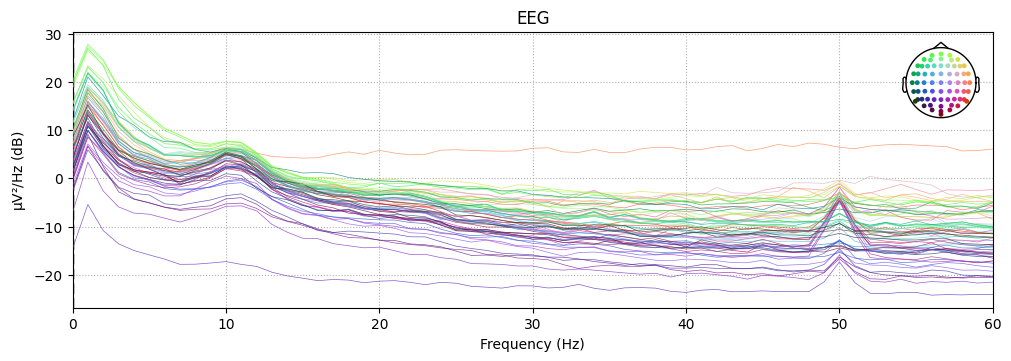

In [2]:
raw.compute_psd(fmax=60).plot(picks=raw.ch_names[0:64])
plt.show()

In [3]:
events_raw = mne.find_events(raw, shortest_event = 0)
# events = np.delete(events_raw, [0, 1 ,4], axis= 0) #remove first event because that is power status
events = events_raw

event_dict =  {'12Hz': 8,
'24Hz': 4,
'6Hz': 10,
'30Hz': 2,
'trial_begin': 1,
'trial_end': 20,
'end_exper': 40
}

events

Trigger channel STATUS has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
61 events found on stim channel STATUS
Event IDs: [ 1  2  4  8 10 20 40]


array([[ 36892,      0,      1],
       [ 38941,      0,      8],
       [ 49182,      0,     20],
       [ 53283,      0,      1],
       [ 55332,      0,      2],
       [ 65573,      0,     20],
       [ 69671,      0,      1],
       [ 71720,      0,      4],
       [ 81964,      0,     20],
       [ 86061,      0,      1],
       [ 88114,      0,     10],
       [ 98352,      0,     20],
       [102451,      0,      1],
       [104499,      0,     10],
       [114741,      0,     20],
       [118838,      0,      1],
       [120889,      0,      2],
       [131132,      0,     20],
       [135232,      0,      1],
       [137283,      0,      2],
       [147523,      0,     20],
       [151619,      0,      1],
       [153668,      0,     10],
       [163909,      0,     20],
       [168005,      0,      1],
       [170055,      0,     10],
       [180295,      0,     20],
       [184393,      0,      1],
       [186446,      0,      8],
       [196687,      0,     20],
       [20

In [4]:
Epochs = mne.Epochs(raw, events, 
    tmin= -1.0,  
    tmax= 5.0,    
    event_id=event_dict,
    preload = True,
    event_repeated='drop',
    baseline=(-1.0, 0.0),
    verbose=True
    )

Not setting metadata
61 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 61 events and 12289 original time points ...
0 bad epochs dropped


In [5]:
Epochs

Number of events,61
Events,12Hz: 524Hz: 530Hz: 56Hz: 5end_exper: 1trial_begin: 20trial_end: 20
Time range,-1.000 – 5.000 s
Baseline,-1.000 – 0.000 s


In [6]:
Epochs = Epochs.copy().crop(tmin = 0.0, tmax = 5.0)

C:\Users\pipo_\AppData\Local\Temp\ipykernel_22976\139320542.py:3: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  selected_data = Epochs['24Hz'].pick(['Oz']).get_data()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


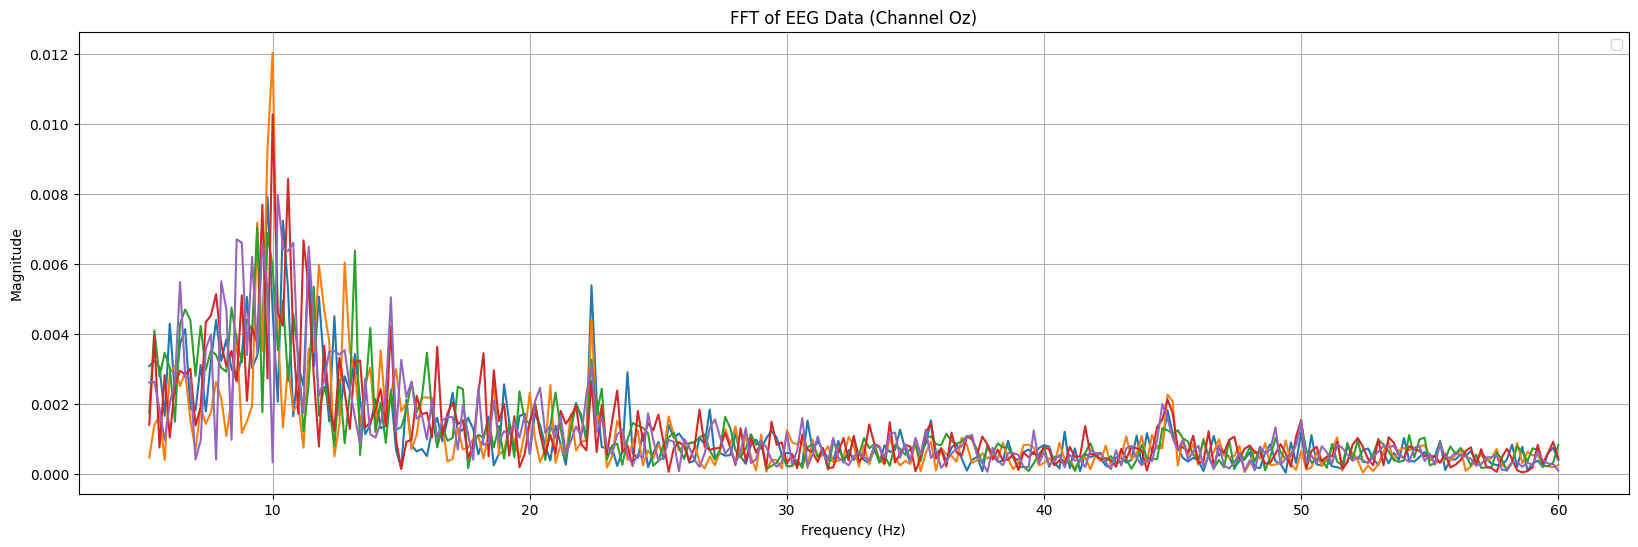

In [7]:
# Compute FFT
sampling_rate = 2048
selected_data = Epochs['24Hz'].pick(['Oz']).get_data()
plt.figure(figsize=(20, 6))

for epoch in range(selected_data.shape[0]):
    fft_result = np.fft.fft(selected_data[epoch,0,:])
    fft_magnitude = np.abs(fft_result)  # Magnitude of the FFT
    fft_frequency = np.fft.fftfreq(selected_data.shape[2], 1/sampling_rate)  # Frequency axis

    # Filter the frequencies between 5 Hz and 60 Hz
    freq_mask = (fft_frequency >= 5) & (fft_frequency <= 60)

    # Apply the mask to filter the magnitudes and frequencies
    filtered_magnitude = fft_magnitude[freq_mask]
    filtered_frequency = fft_frequency[freq_mask]

    # Plot the FFT for this epoch
    plt.plot(filtered_frequency, filtered_magnitude)

# Customize the plot
plt.title(f'FFT of EEG Data (Channel Oz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()



In [8]:
fft_magnitude.shape

(10241,)

    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


C:\Users\pipo_\AppData\Roaming\Python\Python311\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


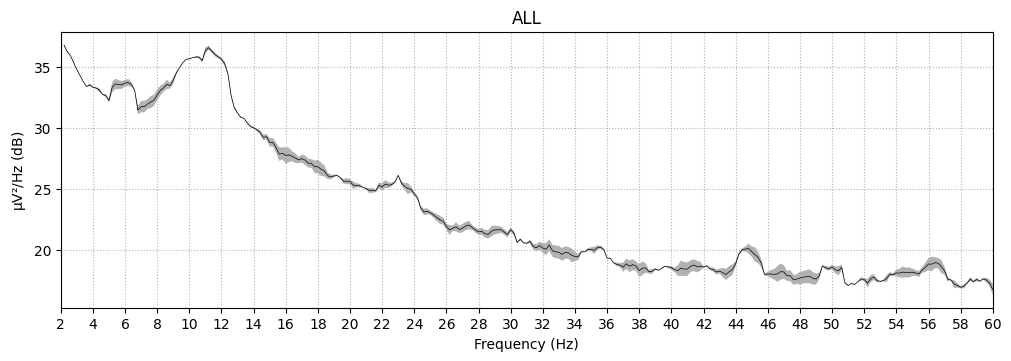

In [9]:
# Compute the PSD
psd = Epochs['12Hz','6Hz','24Hz','30Hz'].pick(['O1', 'Oz']).compute_psd(fmin=2.0, fmax=60.0)

# Plot the PSD
fig = psd.plot(average=True, amplitude=False, picks="data", exclude="bads")

# Customize the x-axis labels
ax = fig.axes[0]  # Get the axis of the first subplot
ax.set_xticks(np.arange(2, 61, 2))  # Set x-axis ticks from 2 to 60
ax.set_xticklabels(np.arange(2, 61, 2))  # Set x-axis labels from 2 to 60
ax.set_title('ALL')

plt.show()

    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


C:\Users\pipo_\AppData\Roaming\Python\Python311\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


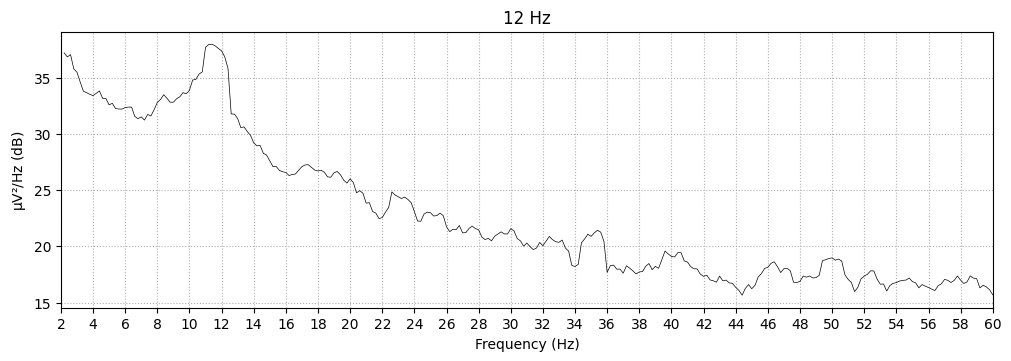

In [10]:
# Compute the PSD
psd = Epochs['12Hz'].pick(['Oz']).compute_psd(fmin=2.0, fmax=60.0)

# Plot the PSD
fig = psd.plot(average=True, amplitude=False, picks="data", exclude="bads")

# Customize the x-axis labels
ax = fig.axes[0]  # Get the axis of the first subplot
ax.set_xticks(np.arange(2, 61, 2))  # Set x-axis ticks from 2 to 60
ax.set_xticklabels(np.arange(2, 61, 2))  # Set x-axis labels from 2 to 60
ax.set_title('12 Hz')

plt.show()

    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


C:\Users\pipo_\AppData\Roaming\Python\Python311\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


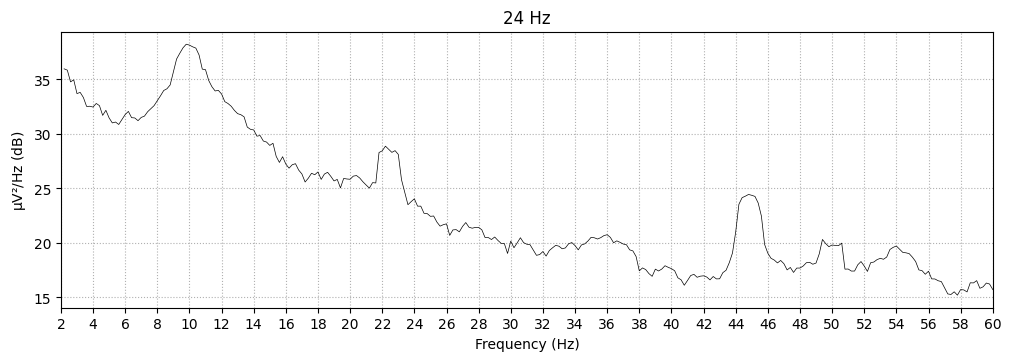

In [11]:
# Compute the PSD
psd = Epochs['24Hz'].pick(['Oz']).compute_psd(fmin=2.0, fmax=60.0)

# Plot the PSD
fig = psd.plot(average=True, amplitude=False, picks="data", exclude="bads")

# Customize the x-axis labels
ax = fig.axes[0]  # Get the axis of the first subplot
ax.set_xticks(np.arange(2, 61, 2))  # Set x-axis ticks from 2 to 60
ax.set_xticklabels(np.arange(2, 61, 2))  # Set x-axis labels from 2 to 60
ax.set_title('24 Hz')

plt.show()

    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


C:\Users\pipo_\AppData\Roaming\Python\Python311\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


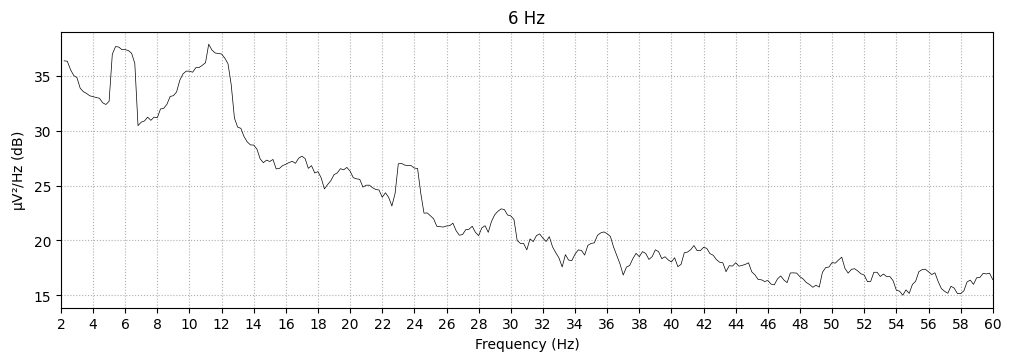

In [12]:
# Compute the PSD
psd = Epochs['6Hz'].pick(['Oz']).compute_psd(fmin=2.0, fmax=60.0)

# Plot the PSD
fig = psd.plot(average=True, amplitude=False, picks="data", exclude="bads")

# Customize the x-axis labels
ax = fig.axes[0]  # Get the axis of the first subplot
ax.set_xticks(np.arange(2, 61, 2))  # Set x-axis ticks from 2 to 60
ax.set_xticklabels(np.arange(2, 61, 2))  # Set x-axis labels from 2 to 60
ax.set_title('6 Hz')

plt.show()

    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


C:\Users\pipo_\AppData\Roaming\Python\Python311\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


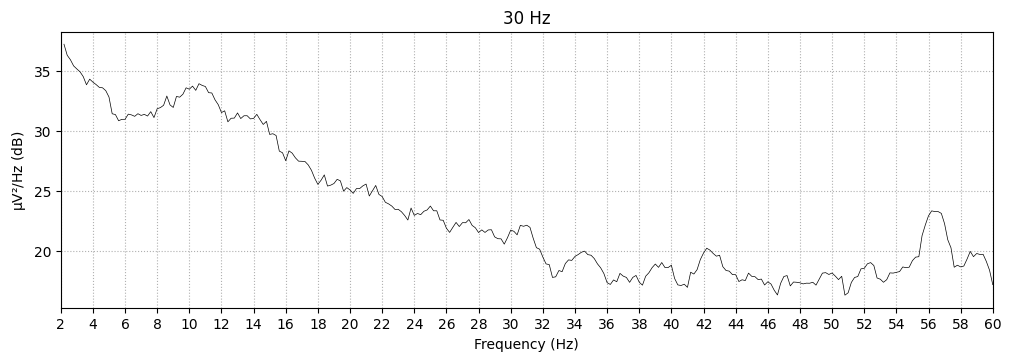

In [13]:
# Compute the PSD
psd = Epochs['30Hz'].pick(['Oz']).compute_psd(fmin=2.0, fmax=60.0)

# Plot the PSD
fig = psd.plot(average=True, amplitude=False, picks="data", exclude="bads")

# Customize the x-axis labels
ax = fig.axes[0]  # Get the axis of the first subplot
ax.set_xticks(np.arange(2, 61, 2))  # Set x-axis ticks from 2 to 60
ax.set_xticklabels(np.arange(2, 61, 2))  # Set x-axis labels from 2 to 60
ax.set_title('30 Hz')

plt.show()